# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


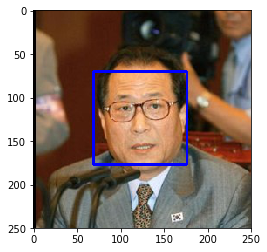

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[5])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path) #take image from file path
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #CONVERT TO GRAYSCALE
    faces = face_cascade.detectMultiScale(gray) #detect edges/face | place into list???
    return len(faces) > 0            #return true IF  faces detected

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

Percentage human face detection: 98.0 %

Percentage dog face detection: 17.0 %

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
h_count = 0
d_count = 0

for x in human_files_short:
    face = face_detector(x)
    if (face == True):
        h_count+=1
h_pcent = (h_count/len(human_files_short)) * 100

for y in dog_files_short:
    face2 = face_detector(y)
    if (face2 == True):
        d_count+=1
d_pcent = (d_count/len(dog_files_short)) * 100
        
print('Percentage human face detection:', h_pcent, "%")   
        
print('Percentage dog face detection:', d_pcent, "%")

Percentage human face detection: 98.0 %
Percentage dog face detection: 17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
#run = face_detector(dog_files[5])
#print(run)


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225])
    ])
    
    img = preprocess(Image.open(img_path))
    
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    #img = img.numpy().transpose((1, 2, 0))
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    #img = np.clip(img, 0, 1)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    
    #plot image
    #plt.imshow(img) ## use when returning image/ returning 'plt'
    
    #make prediction
    
    output = VGG16(img)
    b, pred = torch.max(output,1)
    
    
    
    return pred #plt # predicted class index
run = VGG16_predict(dog_files[5])
print(" \nPredicted Class:", int(run)) #print run: print(run)

 
Predicted Class: 243


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

True


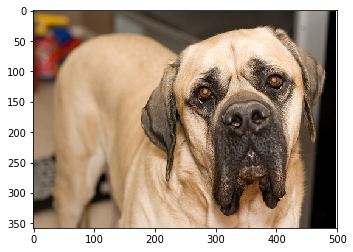

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prdt = VGG16_predict(img_path)
    if prdt>150 and prdt<269:
        dog = True
    else:
        dog = False
    
    return dog # true/false
run = dog_detector(dog_files[5])
print(run)


#attempt at showing dog
img = cv2.imread(dog_files[5])
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

As seen below:
- Percentage dog detection (human): 1.0 %
- Percentage dog detection (dog): 100.0 %

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
h_count = 0
d_count = 0

for x in human_files_short:
    dog = dog_detector(x)
    if (dog == True):
        h_count+=1
h_pcent = (h_count/len(human_files_short)) * 100

for y in dog_files_short:
    dog2 = dog_detector(y)
    if (dog2 == True):
        d_count+=1
d_pcent = (d_count/len(dog_files_short)) * 100
        
print('Percentage dog detection (human):', h_pcent, "%")   
        
print('Percentage dog detection (dog):', d_pcent, "%")

Percentage dog detection (human): 1.0 %
Percentage dog detection (dog): 99.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_dir = '/data/dog_images/train'
val_dir = '/data/dog_images/valid'
test_dir = '/data/dog_images/test'

train_transform = transforms.Compose([transforms.CenterCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomRotation(15),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean = [ 0.485, 0.456, 0.406 ],
                                                         std = [ 0.229, 0.224, 0.225 ]) ])
#validation does not use augmentation
val_transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean = [ 0.485, 0.456, 0.406 ],
                                                         std = [ 0.229, 0.224, 0.225 ])])

test_transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean = [ 0.485, 0.456, 0.406 ],
                                                         std = [ 0.229, 0.224, 0.225 ])])


train_set = datasets.ImageFolder(train_dir, train_transform)
val_set = datasets.ImageFolder(val_dir, val_transform)
test_set = datasets.ImageFolder(test_dir, test_transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=True)

loaders_scratch = {
    'train':train_loader,
    'validate': val_loader,
    'test': test_loader
}

In [12]:
class_names = [item[4:].replace("_", " ") for item in train_set.classes] # strip and clean class names
print("\nClass names: \n\n", class_names)


Class names: 

 ['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute', 'American eskimo dog', 'American foxhound', 'American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog', 'Australian cattle dog', 'Australian shepherd', 'Australian terrier', 'Basenji', 'Basset hound', 'Beagle', 'Bearded collie', 'Beauceron', 'Bedlington terrier', 'Belgian malinois', 'Belgian sheepdog', 'Belgian tervuren', 'Bernese mountain dog', 'Bichon frise', 'Black and tan coonhound', 'Black russian terrier', 'Bloodhound', 'Bluetick coonhound', 'Border collie', 'Border terrier', 'Borzoi', 'Boston terrier', 'Bouvier des flandres', 'Boxer', 'Boykin spaniel', 'Briard', 'Brittany', 'Brussels griffon', 'Bull terrier', 'Bulldog', 'Bullmastiff', 'Cairn terrier', 'Canaan dog', 'Cane corso', 'Cardigan welsh corgi', 'Cavalier king charles spaniel', 'Chesapeake bay retriever', 'Chihuahua', 'Chinese crested', 'Chinese shar-pei', 'Chow chow', 'Clumber spaniel', 'Cocker sp

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- The preprocessing step above uses the CenterCrop function for the datasets, which crops the image to a square of dimensions 224 x 224. This is used as my input tensor because this is a size I have seen in various examples of CNNs such as my previous Udacity project.

- Augmenting the dataset to add more 'spontaneity' seems to be the best practise as it makes training, and hence the model, more robust. Of course, we wouldn't want the training set to differ too greatly from the testing set, so it makes sense to keep augmentation concise. A RandonHorizontalFLip was used at default probability (0.5) ie. 50% chance of flipping; and RandomRotation at 90 degrees, which will do a rotation at either -90 or +90 degrees.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN using Sequential method
        self.convlayer1 = nn.Sequential(
            nn.Conv2d( 3, 8, 5, stride=1, padding=2),
            nn.MaxPool2d(3, 3))
        ##self.convlayer1 = nn.Conv2d( 3, 16, 5, stride=1, padding=2)
        
        self.convlayer2 = nn.Sequential(
            nn.Conv2d(8, 16, 5, stride=1, padding=2),
            nn.MaxPool2d(3,3))
        ##self.convlayer2 = nn.Conv2d(16, 32, 5, stride=1, padding=2)
        
        self.convlayer3 = nn.Sequential(
            nn.Conv2d(16, 32, 5, stride=1, padding=0),
            nn.MaxPool2d(3,3))
        
        self.drop_out = nn.Dropout()
              
        self.fc1 = nn.Linear(1152, 1200)
        #self.fc2 = nn.Linear(1200, 800)
        self.fc3 = nn.Linear(1200, 400)
        self.fc4 = nn.Linear(400, 133)
        #self.fc5 = nn.Linear(200, 133)
                
    
    def forward(self, x):
        ## Define forward behavior
        x = self.convlayer1(x)
        x = self.convlayer2(x)
        x = self.convlayer3(x)
        print(x.shape)     
        x = x.view(x.size(0), -1)
        
        x = self.drop_out(x) 
        x = self.fc1(x) 
        #x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        ##x = self.fc5(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (convlayer1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (convlayer2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (convlayer3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5)
  (fc1): Linear(in_features=1152, out_features=1200, bias=True)
  (fc3): Linear(in_features=1200, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=133, bias=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Several convolutional layers were defined in the __'__ init __'__ function using the __Conv2d__ and __Linear__ methods.
I started with 2 Conv2d and 2 Linear layers, and built it up to 4 Conv2d and 4  Linear layers, then eventually back down to 3 layers both.

Using the function:
W_{out} = \frac{(W_{in} – F + 2P)}{S} + 1

and wanting to keep the output the same as the input, I used kernel size as 5,  stride as 1,  padding as 2 for convlayer1.
Then I increased the output for convlayer2 to 16. I later added the 3rd layer. 

After this I filled in the __forward__ pass function.
I followed the concepts in [Creating the Model](https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/) but wrapped the MaxPool2d within the ReLu method.  I later placed the ReLu activation and MaxPooling in the conv layer.
I wanted to down-sample the image by a factor of 3.

I didnt fully understand the conversion from convolution to linear layer, so it took me some time to figure out the best configuration of layers for accuracy.

After watching this deeplizard [video](https://www.youtube.com/watch?v=gmBfb6LNnZs) as well as this [video](https://www.youtube.com/watch?v=qSTv_m-KFk0) I decided to remove the ReLu activation Function.


_______________________________


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.0005) 

#Started with lr = 0.005;
#lr=0.05 caused awful losses (training and val)
#lr = 0.0005 - best result: 8%   ###increase epochs from 10 to 25
#lr = 0.0003 - still 8%
#lr = 0.00005 - test loss greatly reduced; no difference
#lr = 0.00001 - 5%

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model.forward(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['validate']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            output = model.forward(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        #plt.plot(train_loss, label='Training loss')
        #plt.plot(valid_loss, label='Validation loss')
        #plt.legend(frameon=False)
            
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
        #plt.show()
    # return trained model
    return model

# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
torch.Size([64, 32, 6, 6])
t

In [16]:
# train the model
#model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

In [17]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.0
    correct = 0.0
    total = 0.0

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([32, 32, 6, 6])
torch.Size([4, 32, 6, 6])
Test Loss: 4.050397


Test Accuracy: 11% (93/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
loaders_transfer = {
    'train':train_loader,
    'validate': val_loader,
    'test': test_loader
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

In [21]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [22]:
for param in model_transfer.parameters():
    param.requires_grad = False
    
# Replace the last fully connected layer so that it will classify only 133 classes not 1000...
model_transfer.classifier[6] = nn.Linear(4096, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [23]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I first used the VGG16 model in its entirety. Then I studied the layers and looked at the input & output data parameters. The final layer - the fully connected layer needed to have the output features parameter changed from 1000 classes to 133 classes. 

[This paper](https://arxiv.org/pdf/1409.1556.pdf) outlines the architecture of the VGG16 network which was trained on the ImageNet database, the most comprehensive image dataset in Machine Learning.  The major architectural element is the increase of depth of the neural network to 16–19 weight layers, with the use of very small ( 3 × 3) convolution filters.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier[6].parameters(), lr=0.0003)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
# train the model
model_transfer = train(15, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 2.765276 	Validation Loss: 1.078670
Epoch: 4 	Training Loss: 1.042437 	Validation Loss: 0.568653
Epoch: 5 	Training Loss: 0.950702 	Validation Loss: 0.531071
Epoch: 6 	Training Loss: 0.896916 	Validation Loss: 0.539079
Epoch: 7 	Training Loss: 0.826702 	Validation Loss: 0.478146
Epoch: 8 	Training Loss: 0.793251 	Validation Loss: 0.479716
Epoch: 9 	Training Loss: 0.743897 	Validation Loss: 0.485716
Epoch: 10 	Training Loss: 0.712335 	Validation Loss: 0.457323
Epoch: 11 	Training Loss: 0.705557 	Validation Loss: 0.449158
Epoch: 12 	Training Loss: 0.667774 	Validation Loss: 0.453474
Epoch: 13 	Training Loss: 0.639506 	Validation Loss: 0.445880
Epoch: 14 	Training Loss: 0.618052 	Validation Loss: 0.456901
Epoch: 15 	Training Loss: 0.589759 	Validation Loss: 0.483762


In [26]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.516359


Test Accuracy: 82% (692/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

Mastiff


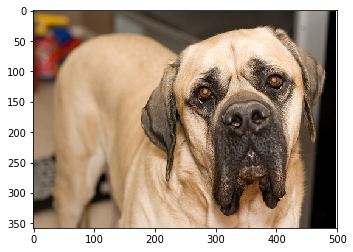

In [28]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    # load the image and return the predicted breed
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225])
    ])
    
    img = preprocess(Image.open(img_path))
    
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    #img = img.numpy().transpose((1, 2, 0))
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    #img = np.clip(img, 0, 1)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    
    #plot image
    #plt.imshow(img) ## use when returning image/ returning 'plt'
    
    #make prediction?????????
    
    output = model_transfer(img)
    b, pred = torch.max(output,1)
    
    return class_names[pred]

trial = predict_breed_transfer(dog_files[5])
print(trial)

#attempt at showing dog
img = cv2.imread(dog_files[5])
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [29]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    #if dog is detected: predict breed
    if dog_detector(img_path):
        #predict class/label
        dog = predict_breed_transfer(img_path)
        print("What a dog! That's what I call a ", dog)
            
    elif face_detector(img_path):#face_detector == True:
        #predict label
        humandog = predict_breed_transfer(img_path)
        print("You're cute! You look a lot like a ", humandog)  
    
    else:
        #print error message
        print("Is this an alien? Try again!")
    
    
    #PLOT THE IMAGE REGARDLESS OF PREDICTION
    img = cv2.imread(img_path)
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output was pretty good. All humans were predicted as human, and all dogs predicted as dogs, and most of neither were predicted accurately, with the exception of some chicken wings, which was predicted as a dog. I guess because it resembles a fluffy dog a little bit :D

1. Maybe add another filter, or maybe a smaller stride to allow for more features to be predicted.
2. Place some visualisations of the training process like, convolution filters; and test and val. loss
3. Test other models
4. Adapt it for the web and user input (Fun interactive activity)

You're cute! You look a lot like a  Beagle


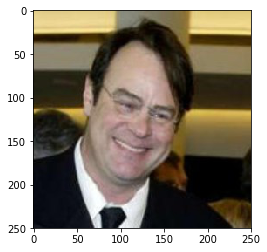

You're cute! You look a lot like a  Dachshund


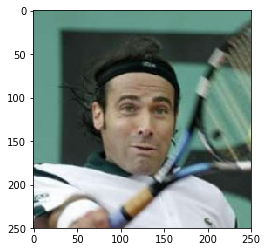

You're cute! You look a lot like a  Dachshund


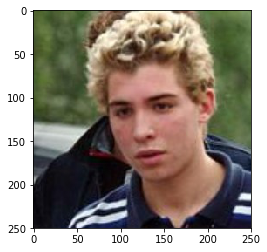

You're cute! You look a lot like a  Welsh springer spaniel


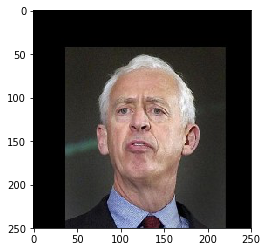

What a dog! That's what I call a  Bullmastiff


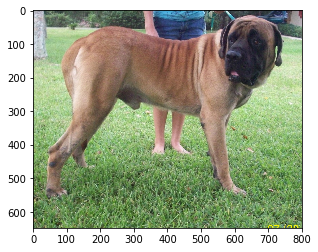

What a dog! That's what I call a  Bullmastiff


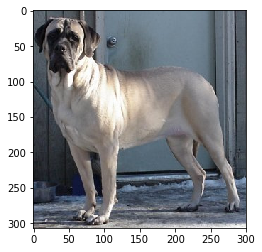

What a dog! That's what I call a  Mastiff


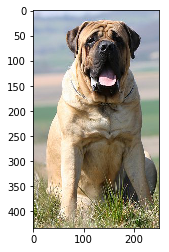

What a dog! That's what I call a  Mastiff


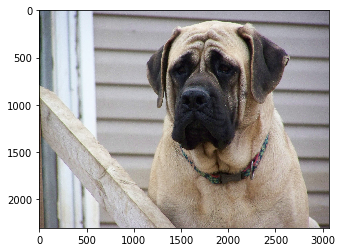

In [30]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:4], dog_files[:4])):
    run_app(file)

You're cute! You look a lot like a  Welsh springer spaniel


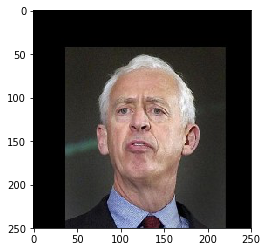

You're cute! You look a lot like a  Welsh springer spaniel


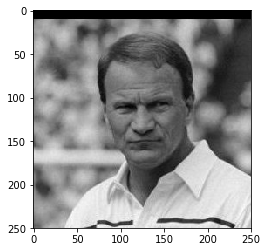

You're cute! You look a lot like a  Welsh springer spaniel


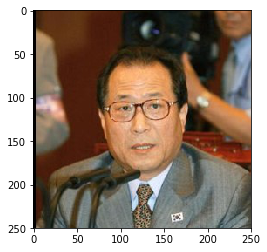

You're cute! You look a lot like a  Brittany


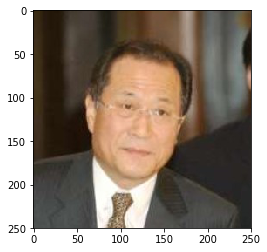

You're cute! You look a lot like a  Dachshund


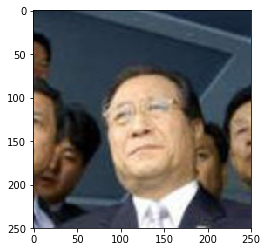

You're cute! You look a lot like a  English toy spaniel


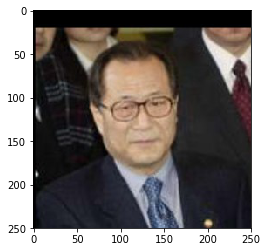

What a dog! That's what I call a  Mastiff


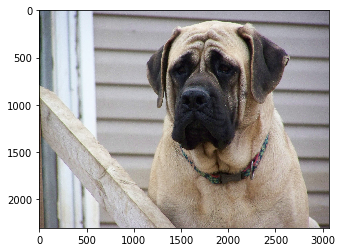

What a dog! That's what I call a  Mastiff


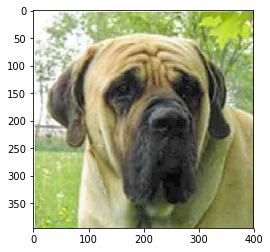

What a dog! That's what I call a  Mastiff


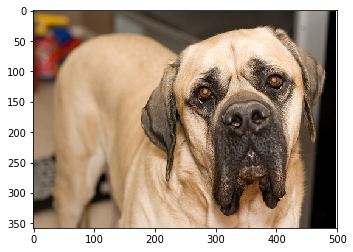

What a dog! That's what I call a  Mastiff


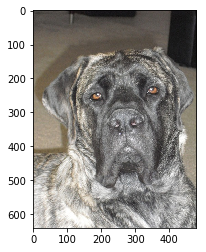

What a dog! That's what I call a  Bullmastiff


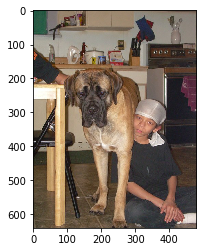

What a dog! That's what I call a  Mastiff


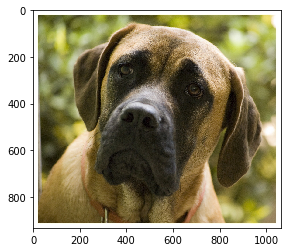

In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[3:9], dog_files[3:9])):
    run_app(file)

In [32]:
add_files = np.array(glob("more/*"))

What a dog! That's what I call a  Beauceron


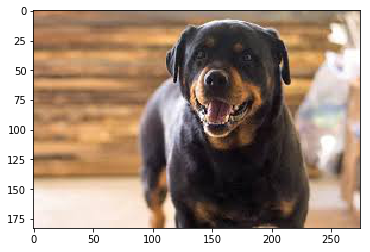

You're cute! You look a lot like a  Chinese crested


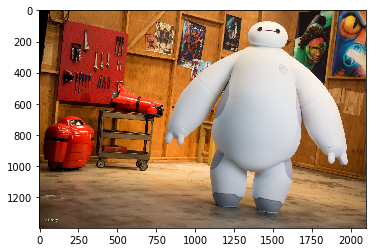

What a dog! That's what I call a  Pomeranian


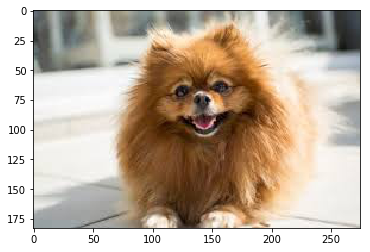

Is this an alien? Try again!


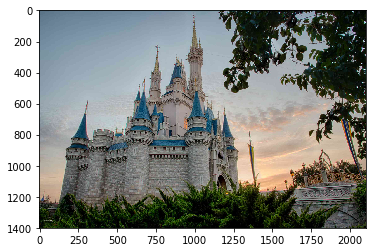

You're cute! You look a lot like a  Chinese crested


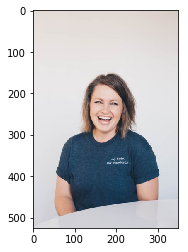

Is this an alien? Try again!


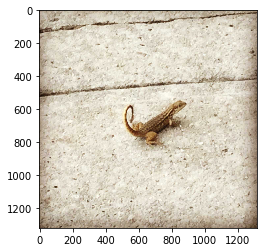

Is this an alien? Try again!


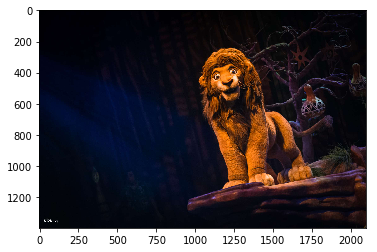

You're cute! You look a lot like a  Welsh springer spaniel


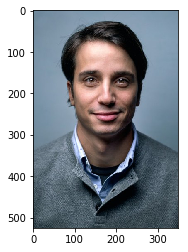

You're cute! You look a lot like a  Silky terrier


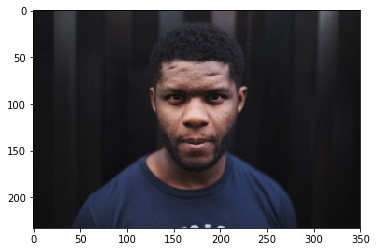

You're cute! You look a lot like a  Lakeland terrier


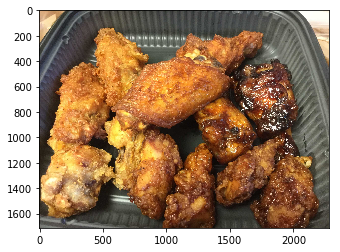

Is this an alien? Try again!


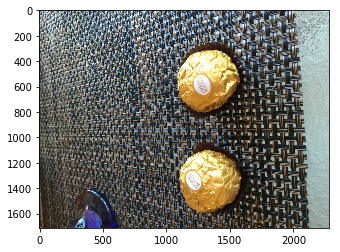

In [33]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((add_files[:])):
    run_app(file)

What a dog! That's what I call a  Pomeranian


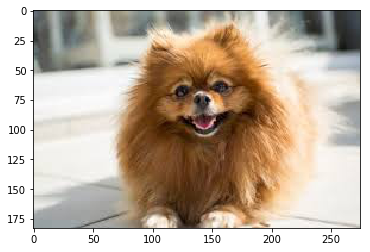

In [34]:
run_app("more/d1.jpg")

What a dog! That's what I call a  Beauceron


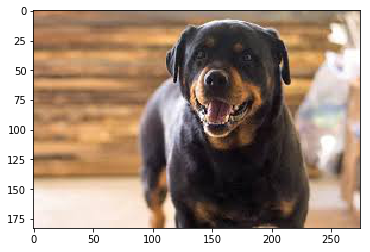

In [35]:
run_app("more/d2.jpg")